# HW3: Pandas, Seaborn, and Statistics
## Names and id's:
### Student 1: Shani Shalev, 316315720
### Student 2: Yosef Ben Yehuda, 207108770

In [4]:
import pandas as pd
import seaborn as sns
import scipy.stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

The [Possum dataset](https://www.kaggle.com/datasets/abrambeyer/openintro-possum) comprises nine morphometric measurements for each of the 104 mountain brushtail possums captured at seven locations spanning from Southern Victoria to central Queensland.  

<img src="https://storage.googleapis.com/kaggle-datasets-images/1534513/2532158/c49c3c89019ed2251376ecfcf7a7eec0/dataset-cover.jpg?t=2021-08-17-01-33-40" width="200"/>


In [2]:
filename = '../data/possum.csv'

Read the dataset into a pandas dataframe named `possum_data`.

In [6]:
#Your code here
possum_data = pd.read_csv(filename)

Print a list of the dataset column names.

In [4]:
#Your code here
list_of_columns = possum_data.columns
list_of_columns



Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

how many rows and columns the dataframe contains?

In [5]:
#Your code here
# option 1
num_of_columns = possum_data.shape[1]
num_of_rows = possum_data.shape[0]
print(f'There are {num_of_rows} rows, and {num_of_columns} columns in the dataframe')

# option 2
possum_data.shape

There are 104 rows, and 14 columns in the dataframe


(104, 14)

Which columns contain null values? Provide a series containing only those columns along with their respective counts.

In [8]:
#Your code here
missing_values = possum_data.isnull().sum()
print(missing_values[missing_values > 0])

age         2
footlgth    1
dtype: int64


Remove the **rows** with missing values.

In [9]:
#Your code here
possum_data = possum_data.dropna()
possum_data.shape # check the shape of the new dataframe, original shape was (104, 14), new shape should be (101, 14)

(101, 14)

Generate a new column named 'body_ratio' based on ratio between the head length ('hdlngth') and total size ('totlngth').

In [10]:
#Your code here
possum_data['body_ratio'] = possum_data['hdlngth'] / possum_data['totlngth']
possum_data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,body_ratio
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1.057303
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1.010929
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0.984293
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1.013043
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1.070175


Is the body ratio correlated to age? is it correlated to belly size? report the Pearson coefficients and corresponding p-values.

In [11]:
#Your code here
# body ratio and age
pearson_coef_age, p_value_age = scipy.stats.pearsonr(possum_data['body_ratio'], possum_data['age'])
print(f'Age: r = {round(pearson_coef_age, 3)}, P-value: {round(p_value_age, 3)}')
# body ratio and belly size
pearson_coef_belly, p_value_belly = scipy.stats.pearsonr(possum_data['body_ratio'], possum_data['belly'])
print(f'Belly: r = {round(pearson_coef_belly, 3)}, P-value: {round(p_value_belly, 3)}')



NameError: name 'scipy' is not defined

Use seaborn to generate a single histogram plot of the body ratio, showing the distribution for each sex separately. Experiment with varying the number of bins to observe its effect on the visualization. 
Setting kde=True to add a smooth line called a "kernel density estimate" (KDE) to the histogram bars. This line provides an approximation of the underlying probability density function of the data, helping visualize the distribution more smoothly.

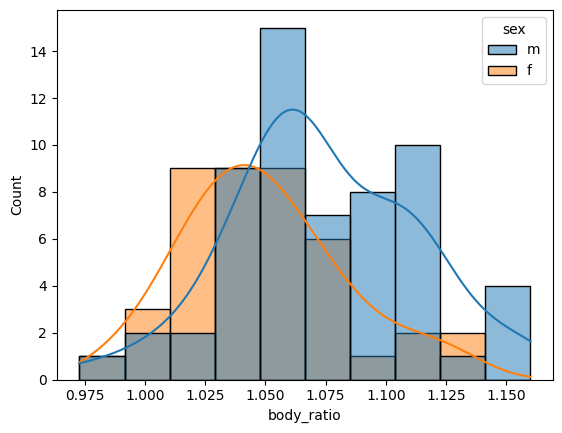

In [12]:
sns.histplot(data=possum_data, x='body_ratio', hue='sex', kde = True, bins = 10);

Use an appropriate statistical test to test the assumption that the mean of body ratio for males and females is equal. Import any necessary libraries.

In [11]:
#Your code here
# H0: mean F == mean M
# H1: mean  F != mean M
# alpha = 0.05
female_body_ratio = possum_data.loc[possum_data.sex=='f']['body_ratio']
male_body_ratio = possum_data.loc[possum_data.sex=='m']['body_ratio'] 
scipy.stats.ttest_ind(male_body_ratio, female_body_ratio)

TtestResult(statistic=3.3675353321330803, pvalue=0.0010813123298912882, df=99.0)

How many sites are listed in the 'Site' column? How many rows are associated with each site?

In [12]:
#Your code here
site_counts = possum_data['site'].value_counts()
site_counts

site
1    33
7    18
5    13
6    13
2    10
3     7
4     7
Name: count, dtype: int64

Remove rows associated with sites that occur fewer than 10 times in the dataset.

In [16]:
#Your code here
site_counts = possum_data['site'].value_counts()
sites_to_keep = site_counts[site_counts >= 10].index # sites with 10 or more rows
possum_data = possum_data[possum_data['site'].isin(sites_to_keep)] # keep only rows with sites that have 10 or more rows
possum_data.shape # check the shape of the new dataframe, original shape was (101, 15), new shape should be (87, 15)

(87, 15)

Create a summary DataFrame that calculates the average body ratio for each site.

In [19]:
#Your code here
site_avg_body_ratio = possum_data.groupby('site')['body_ratio'].mean()
site_avg_body_ratio

site
1    1.045584
2    1.100563
5    1.060515
6    1.056749
7    1.081662
Name: body_ratio, dtype: float64

Generate a boxplot showing the distribution of body ratio across different sites using Seaborn. Before creating the plot, check the data type of the 'site' column. You may need to convert it to a different type before generating the plot.

/var/folders/gy/pcf16vh94yb5bw_rvktb_cyh0000gn/T/ipykernel_3532/2183403352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possum_data['site'] = possum_data['site'].astype('category')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


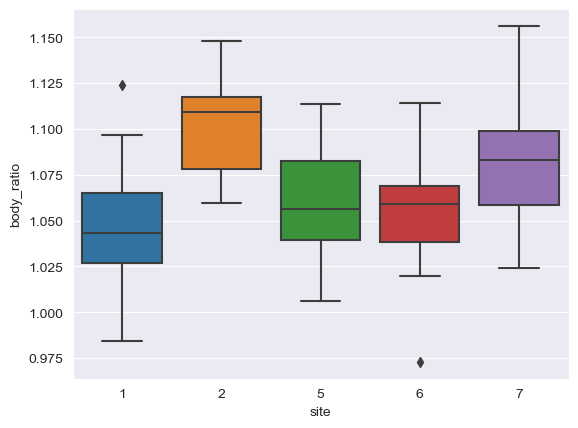

In [21]:
#Your code here
type(possum_data['site'])
possum_data['site'] = possum_data['site'].astype('category')
sns.boxplot(data=possum_data, x='site', y='body_ratio');

Use an appropriate statistical test to determine if there's a significant difference in the mean body ratio across various sites. (Refer to the 'Statistics' notebook for more details.)

In [22]:
#Your code here
model = ols('body_ratio ~ C(site)', data=possum_data).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(site),4.0,0.030970,0.007743,7.0429,0.000063
Residual,82.0,0.090146,0.001099,NaN,NaN


We now want to explore the linear relationship between body ratio and foot length ('footlgth'), separately for each 'sex' category. Create a simple linear regression plot using Seaborn to visualize this relationship.

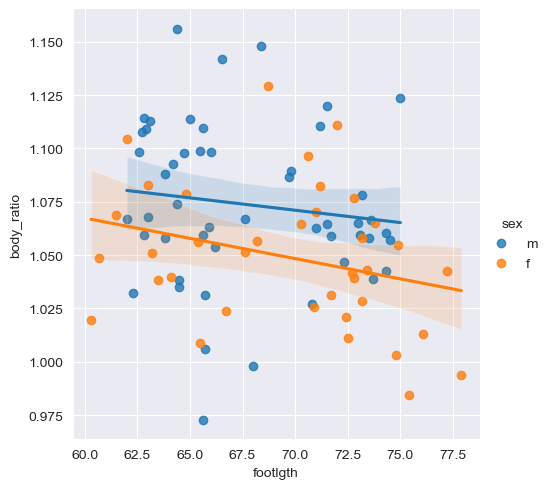

In [32]:
#Your code here
sns.lmplot(data=possum_data, x='footlgth', y='body_ratio', hue='sex');

To delve deeper into this relationship, construct a linear regression model with the body ratio as the dependent variable and foot length ('footlgth') and sex as the independent variables. Print the model summary and determine if sex and foot length are significant variables.

In [38]:
#Your code here
model_1 = ols(formula="body_ratio ~ footlgth+C(sex)", data=possum_data).fit()
model_1.summary() # it seems that sex is a significant variable (p-Val = 0.007), but foot length is not (p-Val = 0.072)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             body_ratio   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     6.885
Date:                Sat, 13 Jul 2024   Prob (F-statistic):            0.00170
Time:                        16:01:32   Log-Likelihood:                 169.25
No. Observations:                  87   AIC:                            -332.5
Df Residuals:                      84   BIC:                            -325.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1562      0.059     19.609      0.000       1.039       1.273
C(sex)[T.m]     0.0217      0.008      2.774      0.007       0.006       0.037
footlgth       -0.0015      0.001     -1.825      0.072      -0.003       0.000
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.375
Skew:                          -0.021   Prob(JB):                        0.829
Kurtosis:                       3.319   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Generate a new model, now also including tail ('taill') and belly sizes. Did the R^2 value improve? Utilize an F-test to ascertain whether the addition of the new variables is statistically significant.

In [41]:
#Your code here
model_2 = ols(formula="body_ratio ~ footlgth + C(sex) + taill + belly", data=possum_data).fit()
model_2.summary() # R^2 improved from 0.141 to 0.392
F_statistic, p_value, df = (model_2.compare_f_test(model_1)) # the addition of the new variables is statistically significant
print(f"F statistic = {round(F_statistic,2)}, p-value= {round(p_value,2)}, degrees of freedom = {df}")

F statistic = 16.96, p-value= 0.0, degrees of freedom = 2.0


### Last section
Perform three different statistical tests and create three diverse figures that you believe are both intriguing and useful for analysis.

NameError: name 'ols' is not defined

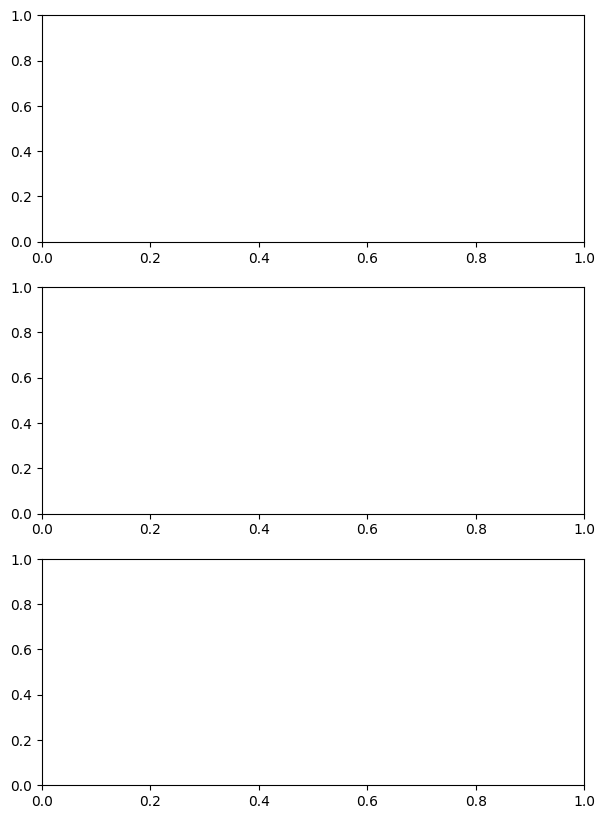

In [13]:
#Your code here
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(7, 10))

# statistic test 1:  Test if there is a significant difference in 'totlngth' across sites - ANOVA
model_totlngth_sex = ols('totlngth ~ C(site)', data=possum_data).fit()
anova_table = sm.stats.anova_lm(model_totlngth_sex, typ=2)
print(f'ANOVA results for difference in totlngth across sites are: \n{anova_table}\n')
# plot stats 1: distribution of body ratio across different sites using boxplot
sns.boxplot(data=possum_data, x='site', y='totlngth', ax=axes[0]);
axes[0].set_title('Boxplot of total length across sites')

# statistic test 2: Test if there is a significant linear relationship between 'belly' and 'chest' - linear regression
model_belly_chest = ols('belly ~ chest', data=possum_data).fit()
print(f'Linear regression results for belly vs chest are: \n{model_belly_chest.summary()}\n')
# plot stats 2: linear regression of belly vs chest
sns.regplot(data=possum_data, x='chest', y='belly', ax=axes[1]);
axes[1].set_title('Linear Regression of belly vs chest')

# statistic test 3: Test if there is a significant difference in 'age' across both sexes - t-test
male_age = possum_data[possum_data['sex'] == 'm']['age']
female_age = possum_data[possum_data['sex'] == 'f']['age']
t_test_res = scipy.stats.ttest_ind(male_age, female_age)
print(f'T test result for difference in age across both sexes is: \n{t_test_res}\n')
# plot stats 3: histogram of age for both sexes
# histogram for male
sns.histplot(male_age, color='blue', label='Male', kde=True, ax=axes[2])
# histogram for females
sns.histplot(female_age, color='pink', label='Female', kde=True, ax=axes[2])
# Set the title for the subplot
axes[2].set_title('Histogram of Age for Males and Females')
# Display the legend
axes[2].legend()

# Display all of the plots
plt.tight_layout()
plt.show()